<a href="https://colab.research.google.com/github/ykato27/Object-Detection/blob/main/SAHI_Inference_for_mmdetection_Tutorial_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Preperation

- Install latest version of SAHI and MMDetection:

In [1]:
!pip install -U torch sahi mmdet mmcv-full imantics fiftyone >> /dev/null

In [2]:
import os
import torch
os.getcwd()

device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

- Import required modules:

In [3]:
# arrange an instance segmentation model for test
from sahi.utils.mmdet import (
    download_mmdet_cascade_mask_rcnn_model,
    download_mmdet_config,
)

# import required functions, classes
from sahi.model import MmdetDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


- Download a cascade mask rcnn model and two test images:

In [4]:
# download cascade mask rcnn model&config
model_path = 'models/cascade_mask_rcnn.pth'
download_mmdet_cascade_mask_rcnn_model(model_path)
config_path = download_mmdet_config(model_name="cascade_rcnn", config_file_name="cascade_mask_rcnn_r50_fpn_1x_coco.py",)

# download test images into demo_data folder
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

## 1. Standard Inference with a MMDetection Model

- Instantiate a detection model by defining model weight path, confing path and other parameters:

In [5]:
detection_model = MmdetDetectionModel(
    model_path=model_path,
    config_path=config_path,
    confidence_threshold=0.4,
    device=device,
)

load checkpoint from local path: models/cascade_mask_rcnn.pth


- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:

In [6]:
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

/usr/local/lib/python3.7/dist-packages/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [7]:
result = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_model)

- Visualize predicted bounding boxes and masks over the original image:

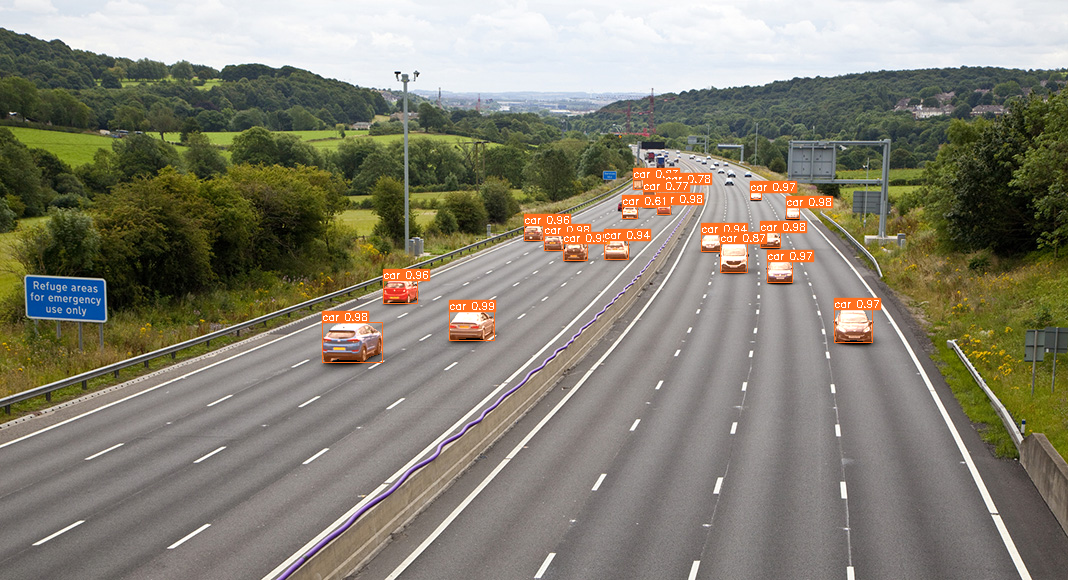

In [8]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a MMDetection Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [9]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Number of slices: 15


- Visualize predicted bounding boxes and masks over the original image:

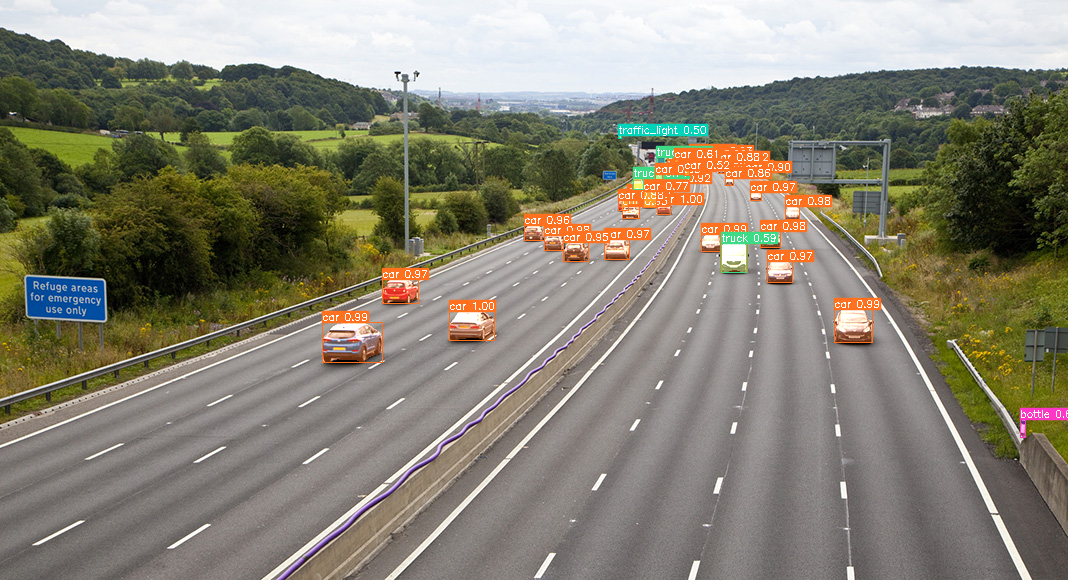

In [10]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [11]:
object_prediction_list = result.object_prediction_list

In [12]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(449, 311, 494, 340), w: 45, h: 29>,
    mask: <sahi.annotation.Mask object at 0x7fe049c91b90>,
    score: PredictionScore: <value: 0.9979058504104614>,
    category: Category: <id: 2, name: car>>

- ObjectPrediction's can be converted to [COCO annotation](https://cocodataset.org/#format-data) format:

In [13]:
result.to_coco_annotations()[0]

{'area': 1092,
 'bbox': [449, 311, 45, 29],
 'category_id': 2,
 'category_name': 'car',
 'image_id': None,
 'iscrowd': 0,
 'score': 0.9979058504104614,
 'segmentation': [[460,
   311,
   459,
   312,
   458,
   312,
   457,
   313,
   457,
   314,
   455,
   316,
   455,
   317,
   452,
   320,
   452,
   321,
   450,
   323,
   450,
   325,
   449,
   326,
   449,
   338,
   450,
   339,
   451,
   339,
   452,
   340,
   454,
   340,
   455,
   339,
   458,
   339,
   459,
   338,
   465,
   338,
   466,
   337,
   478,
   337,
   479,
   338,
   481,
   338,
   482,
   339,
   483,
   339,
   484,
   340,
   487,
   340,
   492,
   335,
   493,
   335,
   494,
   334,
   494,
   322,
   493,
   321,
   493,
   319,
   490,
   316,
   489,
   316,
   487,
   314,
   486,
   314,
   484,
   312,
   483,
   312,
   482,
   311]]}

- ObjectPrediction's can be converted to [COCO prediction](https://github.com/i008/COCO-dataset-explorer) format:

In [14]:
result.to_coco_predictions(image_id=1)[0]

{'area': 1092,
 'bbox': [449, 311, 45, 29],
 'category_id': 2,
 'category_name': 'car',
 'image_id': 1,
 'iscrowd': 0,
 'score': 0.9979058504104614,
 'segmentation': [[460,
   311,
   459,
   312,
   458,
   312,
   457,
   313,
   457,
   314,
   455,
   316,
   455,
   317,
   452,
   320,
   452,
   321,
   450,
   323,
   450,
   325,
   449,
   326,
   449,
   338,
   450,
   339,
   451,
   339,
   452,
   340,
   454,
   340,
   455,
   339,
   458,
   339,
   459,
   338,
   465,
   338,
   466,
   337,
   478,
   337,
   479,
   338,
   481,
   338,
   482,
   339,
   483,
   339,
   484,
   340,
   487,
   340,
   492,
   335,
   493,
   335,
   494,
   334,
   494,
   322,
   493,
   321,
   493,
   319,
   490,
   316,
   489,
   316,
   487,
   314,
   486,
   314,
   484,
   312,
   483,
   312,
   482,
   311]]}

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [15]:
result.to_imantics_annotations()[0]

- ObjectPrediction's can be converted to [fiftyone](https://github.com/voxel51/fiftyone) detection format:

In [16]:
result.to_fiftyone_detections()[0]

<Detection: {
    'id': '61aa07d02ad5121246b29dc5',
    'attributes': BaseDict({}),
    'tags': BaseList([]),
    'label': 'car',
    'bounding_box': BaseList([
        0.4204119850187266,
        0.5362068965517242,
        0.042134831460674156,
        0.05,
    ]),
    'mask': None,
    'confidence': 0.9979058504104614,
    'index': None,
}>

## 4. Batch Prediction

- Set model and directory parameters:

In [17]:
model_type = "mmdet"
model_path = model_path
model_config_path = config_path
model_device = device
model_confidence_threshold = 0.4

slice_height = 256
slice_width = 256
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

- Perform sliced inference on given folder:

In [18]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_config_path=config_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 3 listed files in folder .
load checkpoint from local path: models/cascade_mask_rcnn.pth


  0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


Number of slices: 15


 33%|███▎      | 1/3 [02:41<05:22, 161.46s/it]

Number of slices: 15


 67%|██████▋   | 2/3 [05:14<02:36, 156.64s/it]

Number of slices: 20


100%|██████████| 3/3 [08:27<00:00, 169.02s/it]

Model loaded in 1.3993501663208008 seconds.
Slicing performed in 0.06491565704345703 seconds.
Prediction performed in 506.7424120903015 seconds.
